In [2]:
import sys
import os
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np
from scipy.stats import poisson
from collections import Counter
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textstat import textstat
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk


sys.path.append('./../')  # Add parent directory to path

from eda_ttr_analysis import *


/Users/catalinamacovei/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/catalinamacovei/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/catalinamacovei/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/catalinamacovei/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /Users/catalinamacovei/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


In [ ]:
languages = ['en', 'fr', 'ro', 'nl', 'da', 'de']
ttr_data = {}

for lang in languages:
    input_csv_path = f'../data/raw_data_csv/{lang}_meds.csv'
    print(f"\nProcessing file: {input_csv_path}")
    ttr_chunks = analyze_csv_data(input_csv_path, lang)
    ttr_data[lang] = ttr_chunks


/Users/catalinamacovei/Developer/AMI/medsbringer/EDA/./../utils/csv_data_cleaning.py:271: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Language', y='TTR', data=ttr_df, palette='muted')


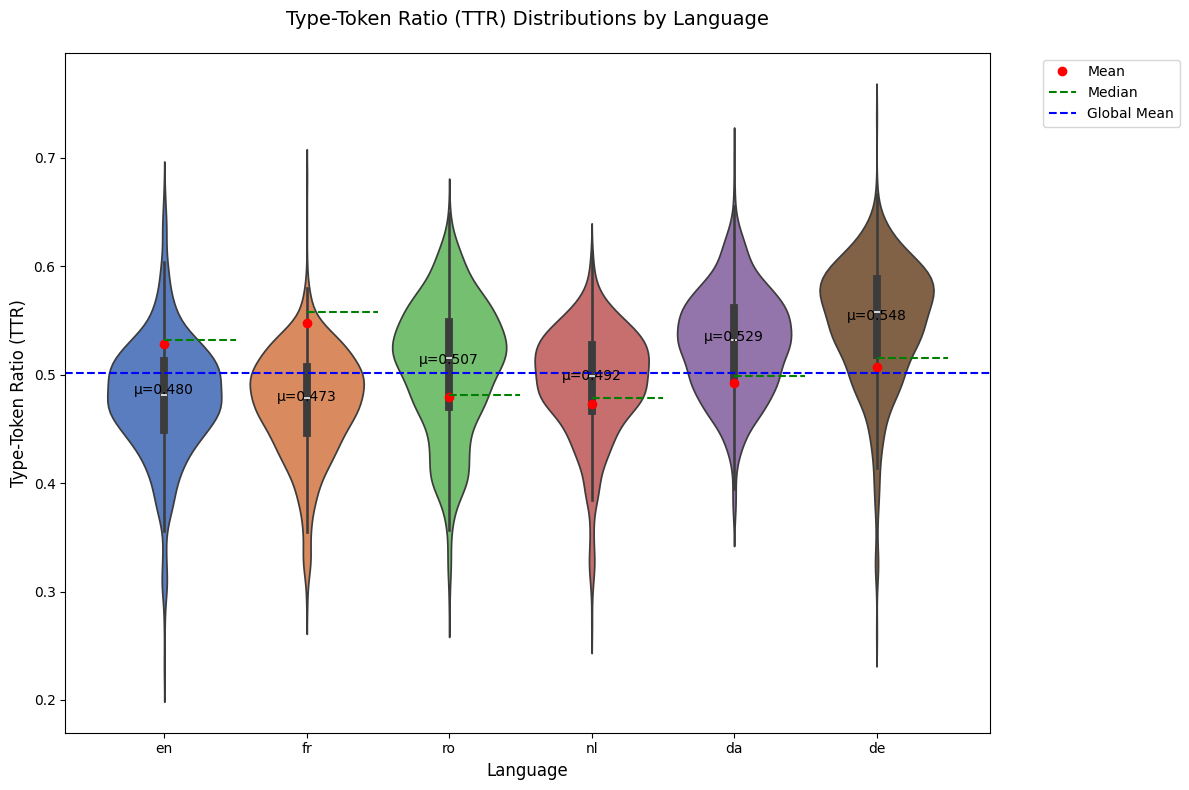

In [14]:
# Create visualizations
plot_ttr_distributions(ttr_data, languages)


In [20]:
def calculate_noun_frequencies(tokens, language='en'):
    """
    Calculate word frequencies using language-specific POS tagging for nouns only.
    """
    if language == 'en':
        # Use NLTK for English - only nouns (NN*)
        tagged_words = pos_tag(tokens)
        content_words = [word for word, tag in tagged_words
                         if tag.startswith('NN')]  # Only noun tags
    else:
        # Use spaCy for other languages
        nlp = spacy_lemmatizers[language]
        # Process in chunks of 100k characters
        content_words = []
        chunk_size = 100000
        text = " ".join(tokens)

        for i in range(0, len(text), chunk_size):
            chunk = text[i:i + chunk_size]
            doc = nlp(chunk)
            chunk_words = [token.text for token in doc
                           if token.pos_ == 'NOUN']  # Only NOUN tag
            content_words.extend(chunk_words)

    word_freqs = {
        word: zipf_frequency(word, language)
        for word in set(content_words)
        if len(word) > 2
    }

    return dict(sorted(word_freqs.items(), key=lambda x: x[1], reverse=True))


In [21]:
def analyze_nouns(input_csv_path, language='en'):
    """
    Analyze the CSV data for word frequencies and TTR distributions.
    """
    data = pd.read_csv(input_csv_path)

    if 'extracted_text' not in data.columns:
        raise ValueError("CSV must contain 'extracted_text' column.")

    tokens_list = []
    for text in data['extracted_text']:
        tokens = preprocess_text(text, language)
        tokens_list.extend(tokens)

    # Calculate metrics
    ttr = calculate_ttr(tokens_list)
    ttr_chunks = chunk_and_calculate_ttr(tokens_list, chunk_size=1000)
    word_freqs = calculate_noun_frequencies(tokens_list, language)

    print(f"TTR (overall): {ttr}")
    print(f"TTR (per 1000 tokens chunk): {ttr_chunks[:5]}")  # Show first 5 chunk TTR values
    print(f"Word Frequencies (top 10): {dict(sorted(word_freqs.items(), key=lambda x: x[1], reverse=True)[:10])}")

    return ttr_chunks



Topics for en:

Topic 1:
injection: 6289.5442
blood: 3601.8825
needle: 3571.5336
skin: 3315.6934
syringe: 3275.5700
filled: 3141.0839
pre: 3105.8950
pen: 2778.8141
infection: 2248.7849
inject: 1943.9620

Topic 2:
vial: 1635.2343
solution: 1380.0187
syringe: 993.7216
injection: 969.5402
eye: 954.9384
powder: 912.7070
pharmacist: 826.9615
inhaler: 798.1991
patient: 721.2218
teva: 689.4462

Topic 3:
blood: 5351.2004
tablet: 4962.1917
pharmacist: 3026.1999
treat: 2980.6846
infection: 2024.9151
symptom: 1916.0009
capsule: 1843.1892
pain: 1805.8760
heart: 1720.4691
problem: 1651.9910

Topic 4:
blood: 4281.5227
infusion: 2416.6731
solution: 1869.4953
cell: 1816.0884
given: 1794.0356
pain: 1698.7600
skin: 1650.6698
accord: 1379.1948
patient: 1197.3212
infection: 1167.2082

Topic 5:
vaccine: 1955.1186
pfizer: 1600.1902
vial: 1305.1645
injection: 1168.9375
given: 741.0942
year: 637.3145
vaccination: 509.6109
reaction: 482.9698
pharmacist: 479.1508
muscle: 467.0399


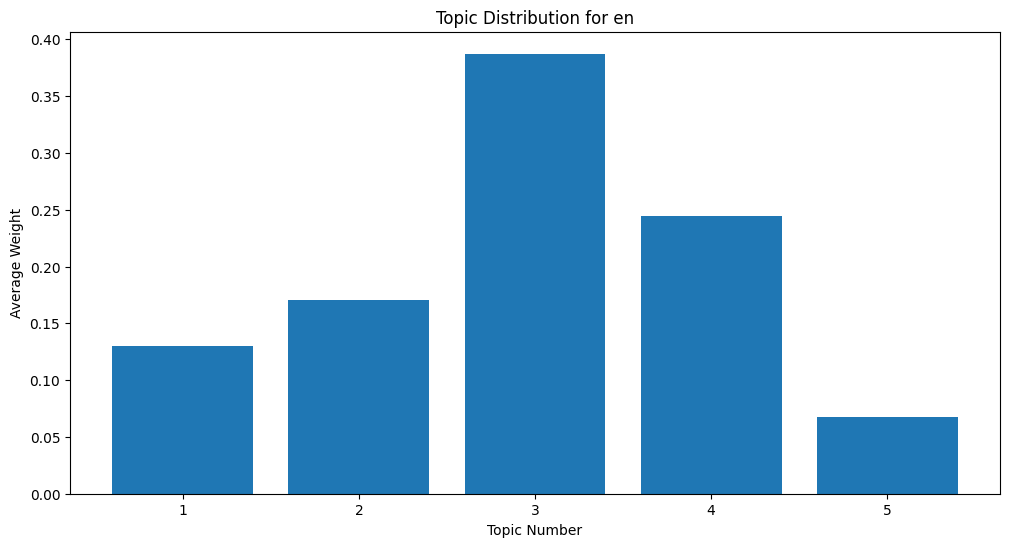


Topics for fr:

Topic 1:
solution: 2111.9268
dose: 1202.0909
infection: 967.9666
amoxiclav: 905.1999
flacon: 904.8928
perfusion: 893.5781
cutané: 868.5938
réaction: 838.4978
administrer: 825.6448
sandoz: 752.6467

Topic 2:
comprimé: 1164.8746
dose: 1038.2120
amlodipine: 1027.1953
cardiaque: 986.4167
douleur: 674.0229
sang: 636.5479
trouble: 609.4570
peau: 608.2780
artériel: 605.7890
sanguin: 604.1718

Topic 3:
dose: 1300.1897
comprimé: 1189.9787
aciclovir: 1013.1982
sandoz: 819.9208
apremilast: 680.1996
ambrisentan: 574.2000
maladie: 571.0263
douleur: 559.5757
pendant: 548.2986
comprimer: 539.7251

Topic 4:
sanguin: 1196.0086
comprimé: 1051.4226
caillot: 774.9268
risque: 755.5454
comprimer: 700.9381
douleur: 612.2834
femme: 575.5152
pendant: 542.4588
saignement: 541.9386
maladie: 510.0429

Topic 5:
alprazolam: 2029.1999
comprimé: 1680.5209
tever: 1614.9668
aripiprazole: 1558.2000
dose: 1319.5427
symptôme: 946.4617
sandoz: 839.3301
trouble: 826.4183
comprimer: 781.9873
patient: 703.792

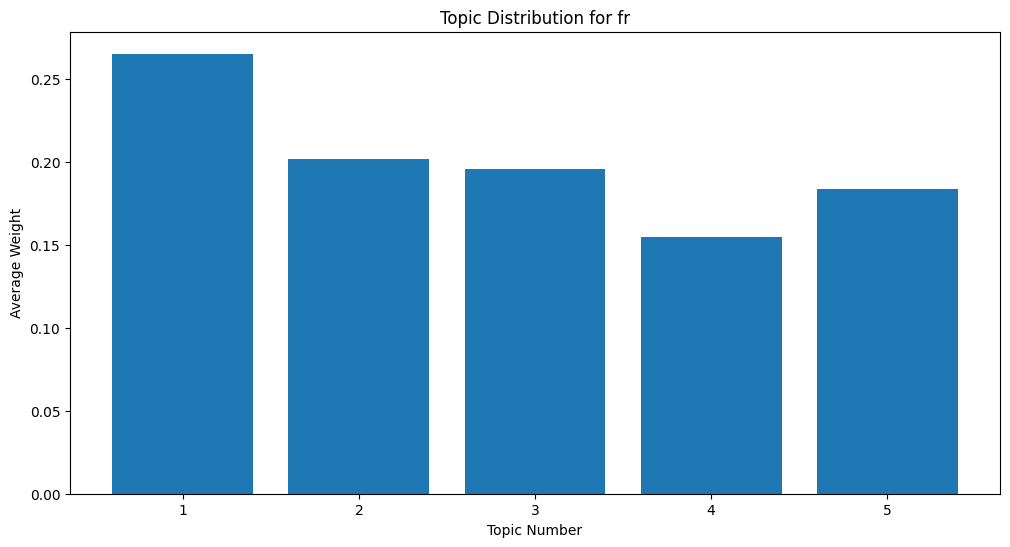


Topics for ro:

Topic 1:
luaţi: 1925.8848
acid: 1555.3681
comprimat: 1237.6804
nivel: 1023.4883
abacavirlamivudin: 1014.2000
durere: 988.5360
simptom: 877.4329
actonel: 840.2000
abacavir: 810.2000
stadă: 766.2018

Topic 2:
acid: 3278.3585
aciclovir: 1958.1988
acetilsalicilic: 1429.5432
comprimat: 1284.0446
acc: 1090.1972
avea: 1015.8994
reacție: 832.5587
efervescent: 823.1999
conține: 790.7573
administra: 751.7160

Topic 3:
nivel: 1353.1084
piele: 1029.7435
sânge: 966.9897
durere: 845.6776
luaţi: 812.0580
aclexa: 784.2000
adagin: 753.2000
zoledronic: 733.1861
utilizaţi: 631.7573
comprimat: 619.6376

Topic 4:
luaţi: 4192.7646
sânge: 3663.4342
abirateronă: 2813.1999
comprimat: 2756.3928
nivel: 2558.7480
stadă: 2124.1982
abatixent: 2080.2000
inimă: 1484.8914
abirateron: 1467.1999
sângerare: 1442.4974

Topic 5:
advil: 1225.1982
grip: 879.0158
răceală: 856.1999
nivel: 795.2215
avea: 791.4819
kabi: 675.1975
administra: 653.7426
sânge: 634.1994
copil: 594.3248
reacție: 580.0893


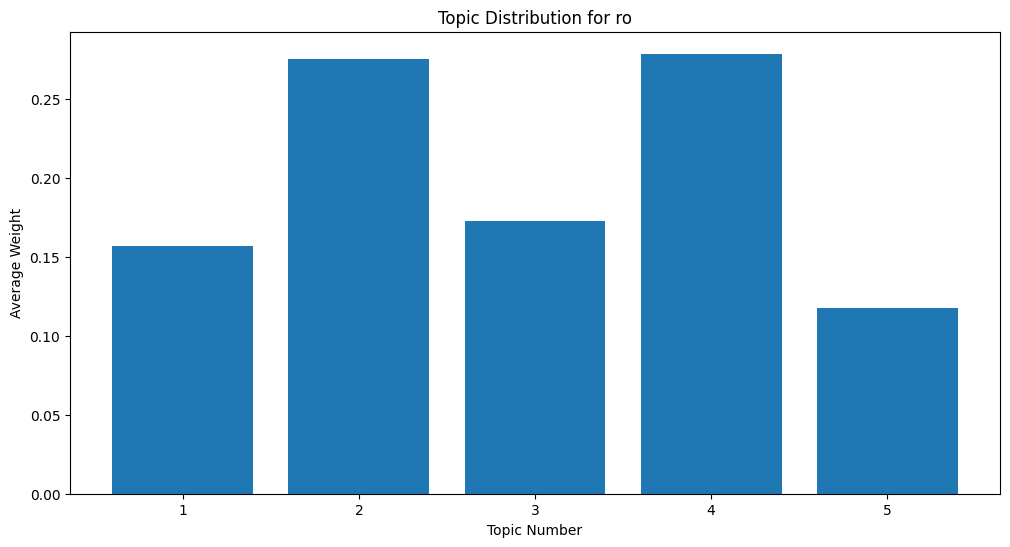

In [ ]:
def perform_topic_modeling(csv_paths, languages, num_topics=5, num_words=10):
    """
    Perform topic modeling on medical texts across different languages.
    """
    topics_by_language = {}
    
    for lang, path in zip(languages, csv_paths):
        # Load and preprocess data
        data = pd.read_csv(path)
        processed_texts = [
            ' '.join(preprocess_text(text, lang)) 
            for text in data['extracted_text']
        ]
        
        # Create document-term matrix
        vectorizer = CountVectorizer(
            max_features=5000,
            min_df=2,
            max_df=0.95
        )
        doc_term_matrix = vectorizer.fit_transform(processed_texts)
        
        # Perform LDA
        lda_model = LatentDirichletAllocation(
            n_components=num_topics,
            random_state=42,
            max_iter=50
        )
        lda_output = lda_model.fit_transform(doc_term_matrix)
        
        # Get feature names
        feature_names = vectorizer.get_feature_names_out()
        
        # Extract and store topics
        topics = []
        for topic_idx, topic in enumerate(lda_model.components_):
            top_words_idx = topic.argsort()[:-num_words-1:-1]
            top_words = [feature_names[i] for i in top_words_idx]
            top_weights = [topic[i] for i in top_words_idx]
            
            topics.append({
                'words': top_words,
                'weights': top_weights
            })
        
        topics_by_language[lang] = topics
        
        # Print topics for this language
        print(f"\nTopics for {lang}:")
        for idx, topic in enumerate(topics):
            print(f"\nTopic {idx + 1}:")
            for word, weight in zip(topic['words'], topic['weights']):
                print(f"{word}: {weight:.4f}")
        
        # Visualize topic distribution
        plt.figure(figsize=(12, 6))
        topic_weights = lda_output.mean(axis=0)
        plt.bar(range(1, num_topics + 1), topic_weights)
        plt.title(f'Topic Distribution for {lang}')
        plt.xlabel('Topic Number')
        plt.ylabel('Average Weight')
        plt.show()
    
    return topics_by_language

# Usage example:
if __name__ == "__main__":
    languages = ['en', 'fr', 'ro', 'nl', 'da', 'de']
    csv_paths = [f'../data/raw_data_csv/{lang}_meds.csv' for lang in languages]
    
    topics = perform_topic_modeling(
        csv_paths=csv_paths,
        languages=languages,
        num_topics=5,  # Number of topics to identify
        num_words=10   # Number of top words per topic
    )


In [8]:

def calculate_poisson_discriminators(csv_paths, languages, threshold=0.001):
    """
    Identify discriminating words using Poisson distribution analysis
    """
    #word counts for each language
    language_word_counts = {}
    document_lengths = {}
    
    for lang, path in zip(languages, csv_paths):
        data = pd.read_csv(path)
        tokens_list = []
        total_words = 0
        
        for text in data['extracted_text']:
            tokens = preprocess_text(text, lang)
            tokens_list.extend(tokens)
            total_words += len(tokens)
            
        word_counts = Counter(tokens_list)
        language_word_counts[lang] = word_counts
        document_lengths[lang] = total_words
    
    #discriminators using Poisson distribution
    discriminators = {}
    for lang in languages:
        discriminators[lang] = {}
        current_counts = language_word_counts[lang]
        
        for word, count in current_counts.items():
            #word rate in current language
            rate = count / document_lengths[lang]
            
            #word frequency in other languages
            other_counts = []
            for other_lang in languages:
                if other_lang != lang:
                    other_count = language_word_counts[other_lang].get(word, 0)
                    other_rate = other_count / document_lengths[other_lang]
                    other_counts.append(other_rate)
            
            #Poisson probability
            if other_counts:
                max_other_rate = max(other_counts)
                if max_other_rate > 0:
                    # Probability of observing this many or more occurrences
                    expected = max_other_rate * document_lengths[lang]
                    p_value = 1 - poisson.cdf(count, expected)
                    
                    # If probability is below threshold, word is discriminating
                    if p_value < threshold:
                        discriminators[lang][word] = {
                            'count': count,
                            'rate': rate,
                            'p_value': p_value
                        }
    
    for lang in languages:
        print(f"\nTop discriminating words for {lang}:")
        sorted_words = sorted(
            discriminators[lang].items(),
            key=lambda x: x[1]['p_value']
        )[:20]
        
        print(f"{'Word':<20} {'Count':<8} {'Rate':<10} {'P-value':<10}")
        print("-" * 48)
        for word, stats in sorted_words:
            print(f"{word:<20} {stats['count']:<8} {stats['rate']:.6f} {stats['p_value']:.8f}")
    
    return discriminators




In [9]:
languages = ['en', 'fr', 'ro', 'nl', 'da', 'de']
csv_paths = [f'../data/raw_data_csv/{lang}_meds.csv' for lang in languages]

discriminators1 = calculate_poisson_discriminators(
    csv_paths=csv_paths,
    languages=languages,
    threshold=0.001 
)



Top discriminating words for en:
Word                 Count    Rate       P-value   
------------------------------------------------
package              1498     0.001216 0.00000000
leaflet              6116     0.004964 0.00000000
user                 776      0.000630 0.00000000
solution             4302     0.003492 0.00000000
injection            9173     0.007446 0.00000000
insulin              1566     0.001271 0.00000000
start                1920     0.001558 0.00000000
instruction          1396     0.001133 0.00000000
pen                  2780     0.002257 0.00000000
question             1759     0.001428 0.00000000
pas                  838      0.000680 0.00000000
harm                 811      0.000658 0.00000000
even                 1129     0.000916 0.00000000
sign                 3151     0.002558 0.00000000
side                 13930    0.011307 0.00000000
effect               14489    0.011761 0.00000000
talk                 3849     0.003124 0.00000000
possible       

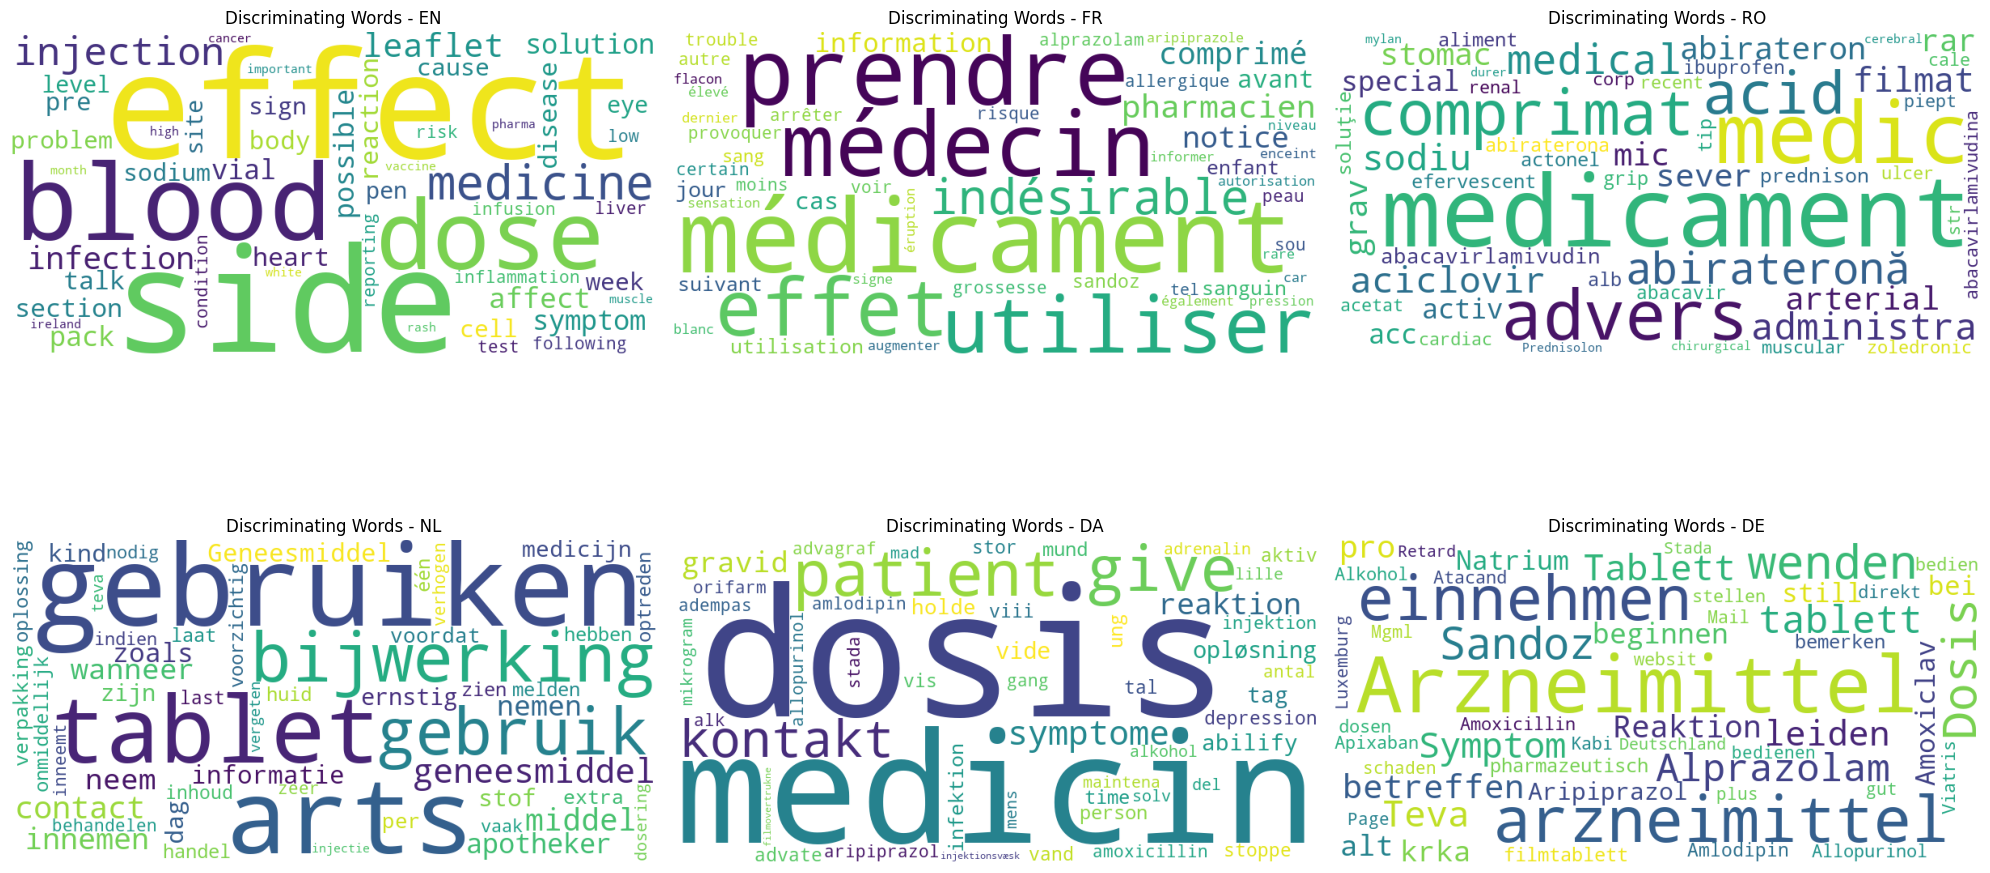

<Figure size 640x480 with 0 Axes>

In [14]:
def plot_language_wordclouds(discriminators1, languages):
    """
    Create wordclouds for discriminating words in each language
    """
    fig, axes = plt.subplots(2, 3, figsize=(20, 12))
    
    for lang, ax in zip(languages, axes.flatten()):
        # Create word frequency dict
        word_freqs = {
            word: stats['rate'] * 10000  # Scale up the rates for better visibility
            for word, stats in discriminators1[lang].items()
        }

        wordcloud = WordCloud(
            width=800, 
            height=400,
            background_color='white',
            max_words=50
        ).generate_from_frequencies(word_freqs)
        
        ax.imshow(wordcloud)
        ax.axis('off')
        ax.set_title(f'Discriminating Words - {lang.upper()}')
    
    plt.tight_layout()
    plt.show()

plot_language_wordclouds(discriminators1, languages)
plt.savefig('./wordclouds.jpg')

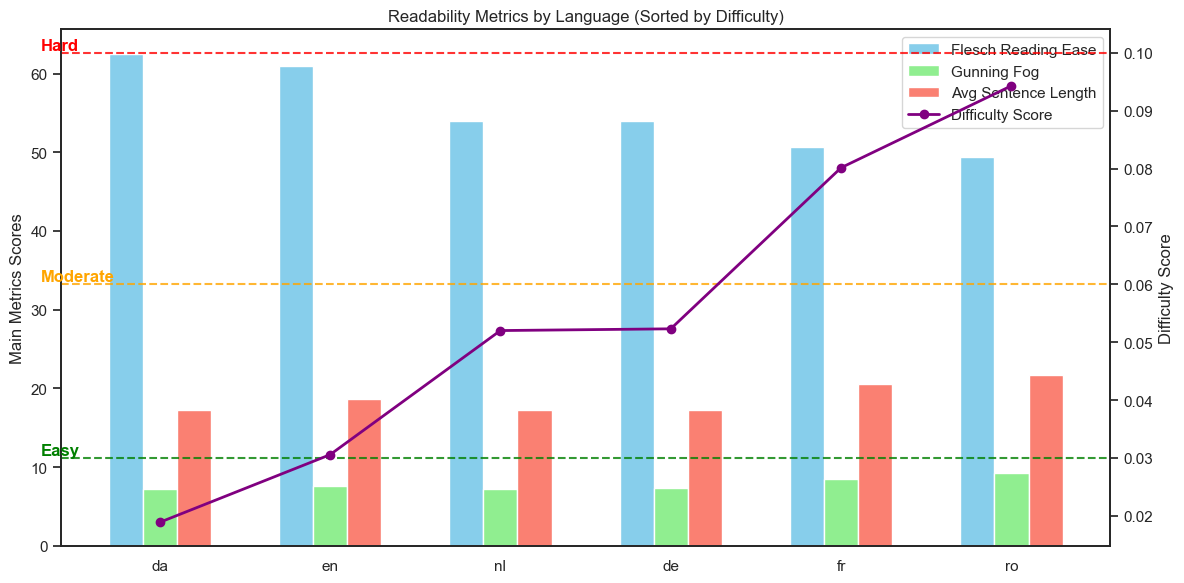

Readability metrics by language:
    flesch_reading_ease  gunning_fog  avg_sentence_length  difficulty_score
en                60.95         7.60                 18.7              0.03
fr                50.67         8.45                 20.5              0.08
ro                49.45         9.26                 21.7              0.09
de                54.02         7.33                 17.2              0.05
da                62.48         7.19                 17.2              0.02
nl                53.92         7.25                 17.3              0.05


In [46]:
def calculate_readability_metrics(text):
    """Calculate readability metrics for text with difficulty score."""
    #Basic metrics
    flesch = textstat.flesch_reading_ease(text)
    gunning = textstat.gunning_fog(text)
    avg_sent_len = textstat.avg_sentence_length(text)
    syllables_per_word = textstat.avg_syllables_per_word(text)
    
    #normalize metrics as per existing codebase
    normalized_metrics = {
        'flesch_reading_ease': flesch / 100,
        'gunning_fog': gunning / 20,
        'avg_sentence_length': avg_sent_len / 50,
        'avg_syllables_per_word': syllables_per_word / 3
    }
    
    #init
    weights = {
        'flesch_reading_ease': -0.3,
        'gunning_fog': 0.2,
        'avg_sentence_length': 0.1,
        'avg_syllables_per_word': 0.2
    }
    
    difficulty_score = sum(normalized_metrics[metric] * weight 
                         for metric, weight in weights.items())
    
    #return all metrics including raw and difficulty score
    return {
        'flesch_reading_ease': flesch,
        'gunning_fog': gunning,
        'avg_sentence_length': avg_sent_len,
        'difficulty_score': difficulty_score
    }



def analyze_readability_by_language():
    languages = ['en', 'fr', 'ro', 'de', 'da', 'nl']
    metrics_by_lang = {}
    
    for lang in languages:
        file_path = f"./data/clean_data_txt/{lang}_meds.txt"
        with open(file_path, 'r', encoding='utf-8') as file:
            text = file.read()
            metrics = calculate_readability_metrics(text)
            metrics_by_lang[lang] = metrics
    
    return pd.DataFrame(metrics_by_lang).T

def plot_readability_metrics(metrics_df):
    #sort df by difficulty score
    metrics_df = metrics_df.sort_values('difficulty_score')
    
    fig, ax1 = plt.subplots(figsize=(12, 6))
    
    bar_width = 0.2
    r1 = np.arange(len(metrics_df))
    r2 = [x + bar_width for x in r1]
    r3 = [x + bar_width for x in r2]
    
    ax1.bar(r1, metrics_df['flesch_reading_ease'], width=bar_width, label='Flesch Reading Ease', color='skyblue')
    ax1.bar(r2, metrics_df['gunning_fog'], width=bar_width, label='Gunning Fog', color='lightgreen')
    ax1.bar(r3, metrics_df['avg_sentence_length'], width=bar_width, label='Avg Sentence Length', color='salmon')
    ax1.set_ylabel('Main Metrics Scores')
    
    ax2 = ax1.twinx()
    
    difficulty_ranges = [
        (0.03, 'Easy', 'green'),
        (0.06, 'Moderate', 'orange'),
        (0.1, 'Hard', 'red')
    ]
    
    for level, label, color in difficulty_ranges:
        ax2.axhline(y=level, color=color, linestyle='--', alpha=0.8)
        ax2.text(-0.5, level, label, verticalalignment='bottom', color=color, fontweight='bold')
    
    ax2.plot(r2, metrics_df['difficulty_score'], 'o-', label='Difficulty Score', linewidth=2, color='purple')
    ax2.set_ylabel('Difficulty Score')
    
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')
    
    plt.title('Readability Metrics by Language (Sorted by Difficulty)')
    plt.xlabel('Languages')
    plt.xticks([r + bar_width for r in range(len(metrics_df))], metrics_df.index)
    
    plt.tight_layout()
    plt.show()





def main():
    metrics_df = analyze_readability_by_language()
    plot_readability_metrics(metrics_df)
    print("Readability metrics by language:")
    print(metrics_df.round(2))

main()


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/catalinamacovei/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/catalinamacovei/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/catalinamacovei/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Testing word cloud generation...
Top 10 most frequent words:
medicament: 2.20%
dumneavoastră: 1.81%
medic: 1.59%
miligram: 1.24%
advers: 1.00%
luaţi: 0.91%
sânge: 0.82%
comprimat: 0.81%
nivel: 0.79%
tratament: 0.76%


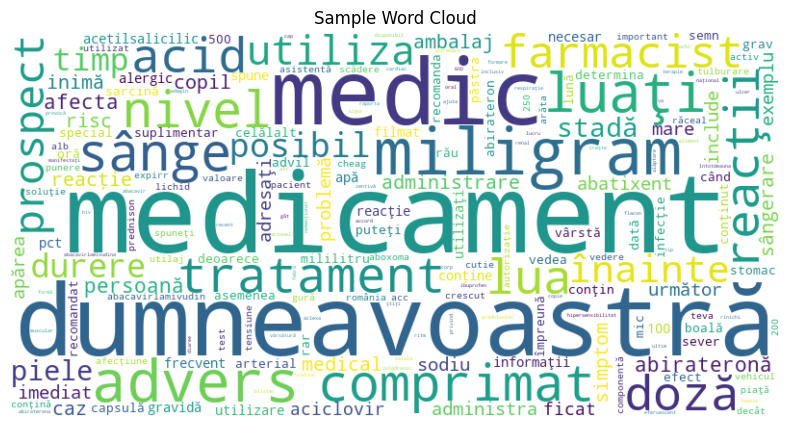

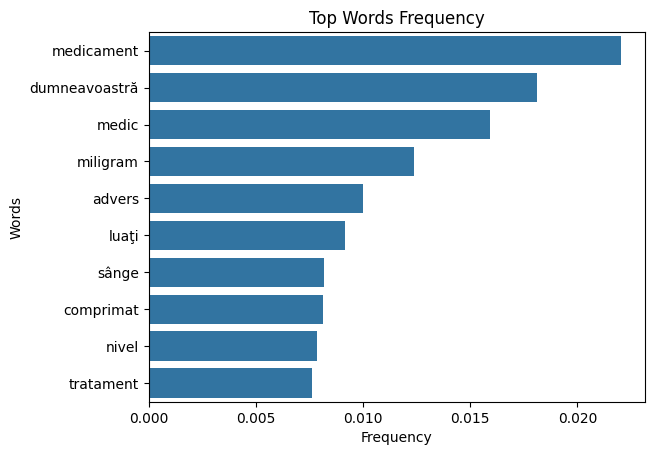

In [5]:

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

STOP_WORDS_EN = set(stopwords.words('english'))
STOP_WORDS_RO = set("""un o si sau dar daca atunci altfel cand unde ce de unde cum de la la pentru cu la pe prin in sus afara in peste despre ca este aceasta aceste acea aceste acele eu mie mea noi noua nostru tu tau el lui ea ei lor fii fost fiind sunt esti este eram erai era erau am avut are avea aveai nu nu poate va ar trebui as putea va fi""".split())
ADDITIONAL_STOP_WORDS = {"hav", "tel", "use", "used"}
STOP_WORDS = STOP_WORDS_EN.union(STOP_WORDS_RO).union(ADDITIONAL_STOP_WORDS)

lemmatizer = WordNetLemmatizer()

def make_freq_analysis(df, text_column="extracted_text", title="Word Cloud", num_top_words=10):
    """Generate and display a word cloud and top word frequencies from the specified text column in df."""
    # Combine all text into a single string
    all_text = " ".join(df[text_column].dropna())

    # Tokenize, lemmatize, and count word frequencies, excluding stop words
    words = [lemmatizer.lemmatize(word.lower()) for word in all_text.split() if word.lower() not in STOP_WORDS]
    word_counts = Counter(words)

    # Calculate frequencies
    total_words = sum(word_counts.values())
    word_freq = {word: count / total_words for word, count in word_counts.items()}

    # Display top frequent words
    print(f"Top {num_top_words} most frequent words:")
    for word, freq in sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:num_top_words]:
        print(f"{word}: {freq:.2%}")

    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.title(title)
    plt.show()

    # Frequency distribution bar plot
    freq_data = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:num_top_words]
    words, freqs = zip(*freq_data)
    sns.barplot(x=list(freqs), y=list(words))
    plt.title('Top Words Frequency')
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.show()


    



file_path = "../data/raw_data_csv/ro_meds.csv"
# Load and clean data
data = clean_csv_data(file_path)

print("Testing word cloud generation...")
make_freq_analysis(data, title="Sample Word Cloud")